In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
file_1 = 'ex1data1.txt'
data_1 = pd.read_csv(file_1, header=None, names=['Population', 'Profit'])
data_1

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [116]:
data_1.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


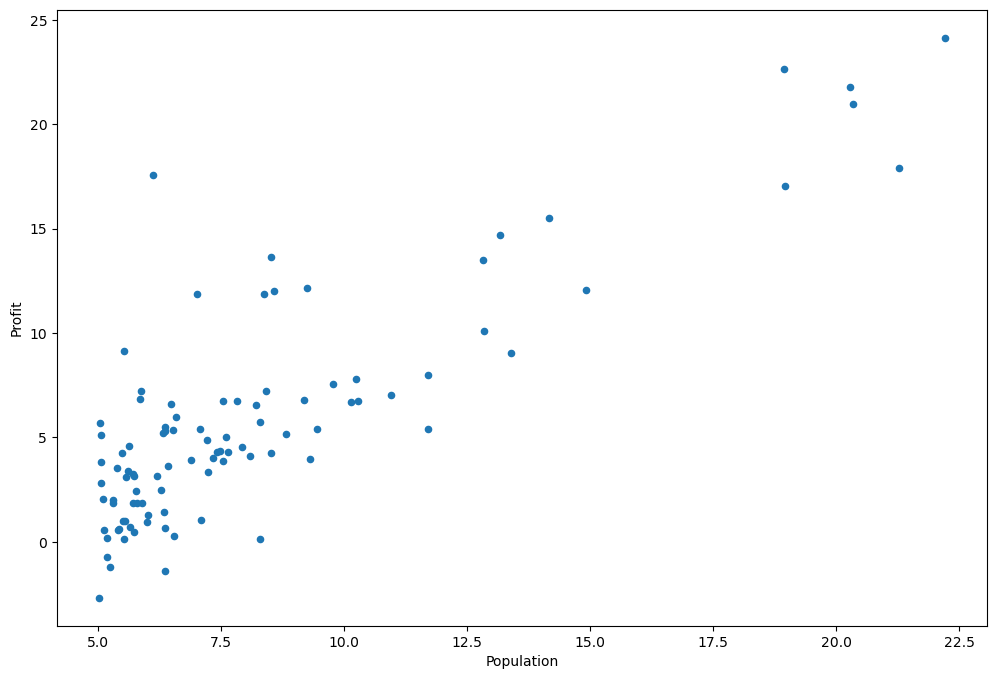

In [117]:
data_1.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

In [118]:
def computeCost(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> float:
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [119]:
data_1.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data_1.shape[1]
X = data_1.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data_1.iloc[:,cols-1:cols]#X是所有行，最后一列    

In [120]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [121]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [122]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.0,0.0]))


In [123]:
theta

matrix([[0., 0.]])

In [124]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [125]:
computeCost(X, y, theta) 

32.072733877455676

In [126]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost
        

In [127]:
alpha = 0.01
iters = 1000

In [128]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [129]:
computeCost(X, y, g)

4.515955503078914

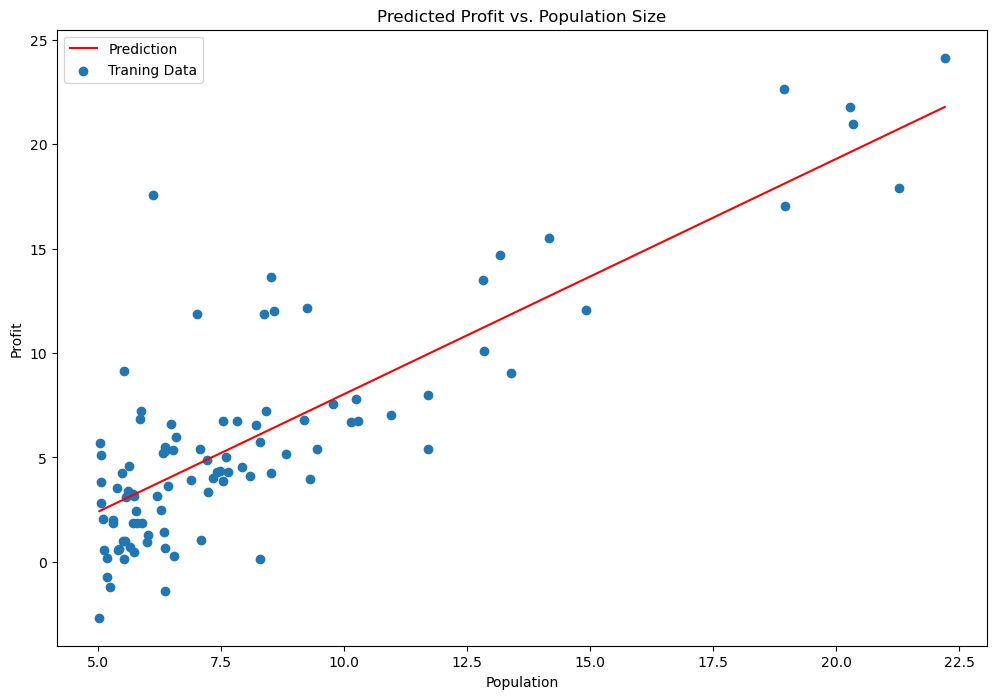

In [130]:
x = np.linspace(data_1.Population.min(), data_1.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data_1.Population, data_1.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

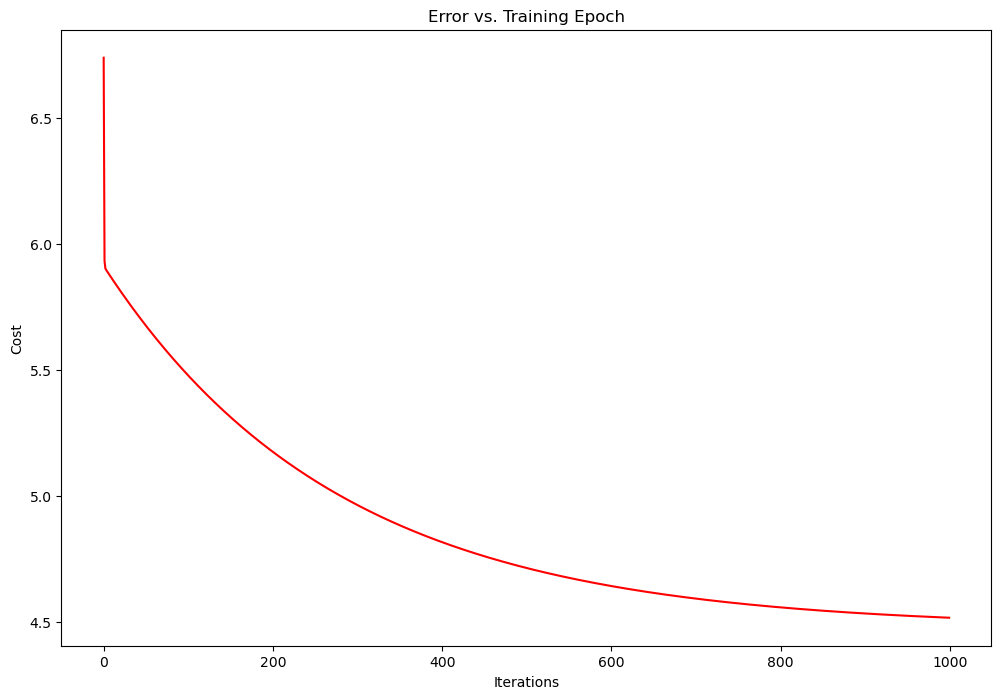

In [131]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [132]:
path = 'ex1data2.txt'
data_2 = pd.read_csv(path, header=None, names = ['sizes', 'bedrooms', 'price'])
data_2.head()



,sizes,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [133]:
data_2 = (data_2 - data_2.mean()) / data_2.std()
data_2.head()

,sizes,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [134]:
data_2.insert(0, 'unitary ones', 1)

cols = data_2.shape[1]
x2 = data_2.iloc[:, 0:cols-1]
y2 = data_2.iloc[:, cols-1:cols]

x2 = np.matrix(x2.values)
y2 = np.matrix(y2.values)


g2, cost2 = gradientDescent(x2, y2, theta2, alpha, iters)
    

In [135]:
computeCost(x2, y2, g2)

0.13070336960771894

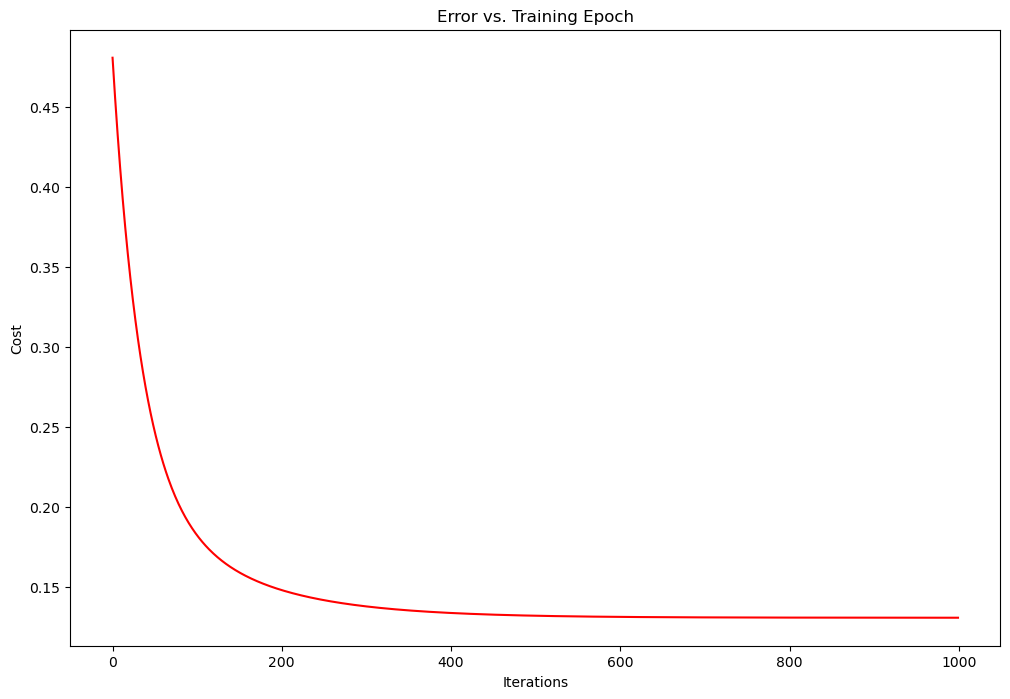

In [136]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [137]:
def normalEqn(X, y):
    theta = (X.T * X).I * X.T * y
    return theta

final_theta2 = normalEqn(x2, y2)
final_theta2


matrix([[-9.06005984e-17],
        [ 8.84765988e-01],
        [-5.31788197e-02]])